In [ ]:
import pandas as pd
df = pd.read_csv('NSE-TATAGLOBAL.csv')

In [ ]:
#df.head()

In [ ]:
train_data = df.iloc[:,1:2]

In [ ]:
train_data.shape

(2035, 1)

In [ ]:
#train_data.head

In [ ]:
#feature  normalization
train_data = train_data.values

In [ ]:
train_data.shape

(2035, 1)

In [ ]:
train_data

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
train_data_scaled=scale.fit_transform(train_data)

In [ ]:
#convert to timestamp of 60
import numpy as np
x_train =[]
y_train = []
for i in range (60,2035):
  x_train.append(train_data_scaled[i-60:i,0])
  y_train.append(train_data_scaled[i,0])
x_train,y_train=np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1975, 60)

In [ ]:
#reshaping to 3D array
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(1975, 60, 1)

In [ ]:
y_train.shape

(1975,)

In [ ]:
#Create model
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
df2 = pd.read_csv('tatatest.csv')

In [ ]:
df2.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65


In [ ]:
test_data = df2.iloc[:,1:2]

In [ ]:
test_data.shape

(16, 1)

In [ ]:
test_data.head

<bound method NDFrame.head of       Open
0   220.10
1   221.10
2   229.45
3   230.30
4   237.70
5   237.10
6   229.70
7   226.25
8   215.00
9   215.00
10  215.50
11  208.00
12  217.00
13  223.50
14  230.00
15  234.55>

In [ ]:
dfx = pd.read_csv('NSE-TATAGLOBAL.csv')
train_data1 = dfx.iloc[:,1:2]
train_data1 = pd.DataFrame(train_data1)
train_data1.shape
test_data = pd.DataFrame(test_data)
det = test_data.append(train_data1)

<ipython-input-24-18a3b39abdc7>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  det = test_data.append(train_data1)


In [ ]:
det.shape

(2051, 1)

In [ ]:
det = det.values

In [ ]:
scale = MinMaxScaler(feature_range=(0,1))
test_data_scaled=scale.fit_transform(det)

In [ ]:
#convert to timestamp of 60
x_test =[]
y_test = []
for i in range (60,2035):
  x_test.append(test_data_scaled[i-60:i,0])
  y_test.append(test_data_scaled[i,0])
x_test,y_test=np.array(x_test), np.array(y_test)

In [ ]:
x_test.shape

(1975, 60)

In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
x_test.shape

(1975, 60, 1)

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

#model.fit(x_train,y_train, epochs=10, batch_size=32)
model.fit(x_train, y_train, epochs=90,validation_data=(x_test, y_test), verbose=1)

Epoch 1/90
62/62 [==============================] - 16s 156ms/step - loss: 0.0182 - mean_absolute_error: 0.0906 - val_loss: 0.0154 - val_mean_absolute_error: 0.0826
Epoch 2/90
62/62 [==============================] - 7s 120ms/step - loss: 0.0131 - mean_absolute_error: 0.0771 - val_loss: 0.0101 - val_mean_absolute_error: 0.0671
Epoch 3/90
62/62 [==============================] - 6s 100ms/step - loss: 0.0081 - mean_absolute_error: 0.0603 - val_loss: 0.0060 - val_mean_absolute_error: 0.0516
Epoch 4/90
62/62 [==============================] - 7s 119ms/step - loss: 0.0052 - mean_absolute_error: 0.0484 - val_loss: 0.0037 - val_mean_absolute_error: 0.0402
Epoch 5/90
62/62 [==============================] - 6s 101ms/step - loss: 0.0040 - mean_absolute_error: 0.0428 - val_loss: 0.0026 - val_mean_absolute_error: 0.0349
Epoch 6/90
62/62 [==============================] - 7s 119ms/step - loss: 0.0034 - mean_absolute_error: 0.0397 - val_loss: 0.0022 - val_mean_absolute_error: 0.0329
Epoch 7/90
62/6

In [ ]:
# make a prediction
ynew = model.predict(x_test)

62/62 [==============================] - 2s 22ms/step


In [ ]:
ynew.shape

(1975, 1)

In [ ]:
test_inverse_predicted = scale.inverse_transform(ynew)

In [ ]:
slic_data = pd.concat([df.iloc[60:2035,1:2].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted'],index=df.iloc[60:2035,1:2].index)], axis=1)

slic_data.head()

,Open,open_predicted
60,271.0,235.516739
61,262.7,235.868668
62,263.0,236.208832
63,265.1,236.476669
64,264.8,236.693710


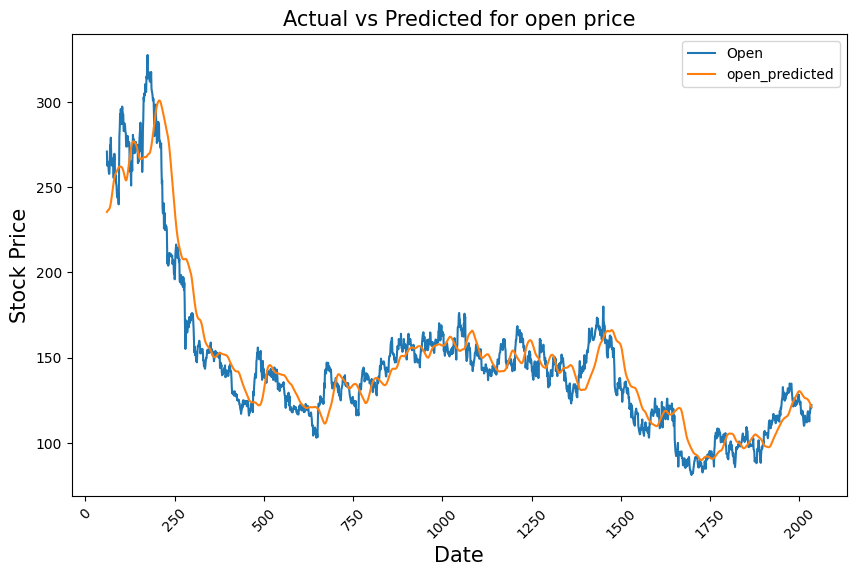

In [ ]:
import matplotlib.pyplot as plt
slic_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

Conclusion: I have successfully performed stock priece prediction